# $\text{Affine Linear Function}\;g_1$

In [ ]:
from kbsa.kbsa_main import run_kbsa, get_kbsa_datafile_name
import numpy as np

#### Define parameters

In [ ]:
models_list = ['linearDecr_1']

kernel_types_list = ['sobolev', 'exponential']
h = 128
model_params_dict = {'linearDecr_1': 
                        {'g_ineq_c': 3.75,
                        'meshInterval': h},}
x_domains_dict = {'linearDecr_1': np.array([[0.25,0.75]])}
u_domains_dict = {'linearDecr_1': np.array([[0,1],[0,1],[0,1]])}
num_of_trials = 20
hsic_types_dict = {'unbiased': False, 'biased': False, 'R2': False, 'fellman': True}
N_list_list = [[100, 1000, 10000]]

#### Run experiment

In [ ]:
for n_list in N_list_list:
        file_name = get_kbsa_datafile_name(models_list=models_list, 
                                x_domains_dict=x_domains_dict, 
                                kernel_types_list=kernel_types_list, 
                                hsic_types_dict=hsic_types_dict, 
                                n_list=n_list, 
                                num_of_trials=num_of_trials,
                                model_params_dict=model_params_dict)

        data = run_kbsa(hsic_types_dict=hsic_types_dict,
                        kernel_types_list=kernel_types_list,
                        models_list=models_list,
                        model_params_dict=model_params_dict,
                        x_domains_dict=x_domains_dict,
                        sample_x_from_mesh=True,
                        u_domains_dict=u_domains_dict,
                        num_of_trials=num_of_trials,
                        n_list=n_list,
                        m_same_as_n=True,
                        save_data=True,
                        with_gpu=False,
                        save_directory='data/g_1/kbsa',
                        file_name=file_name,
                        verbose_inner=True,
                        verbose_outer=True,
                        verbose_inner_inner=True)

#### Load data from file

In [ ]:
from pathlib import Path

folder_sup_path = 'data/g_1/kbsa'
folder_path = Path(f'{folder_sup_path}')
files = [f.name for f in folder_path.iterdir() if f.is_file()]
files

#### Plot results

In [ ]:
from kbsa.kbsa_plotter import plot_hsic
from pathlib import Path
import pickle

for file in files:
    with open(f'{folder_sup_path}/{file}', 'rb') as f:
        data_pkl = pickle.load(f)
        for model in data_pkl.keys():
            file_name = file
            file_name = file_name.replace('linearDecr', 'toy')
            plot_hsic(data_pkl[model], 
                    model_name=model,
                    save_plot=False,
                    save_directory='figs/g_1/kbsa',
                    save_name=f"{file_name}.pdf",
                    no_title=True,
                    no_individual_legends=True,
                    base_fontsize=20,
                    flip_row_cols=True,
                    separate_input_boxplots=True,
                    withTrend=False,
                    grid_toggle=True,
                    multi_setting=True,
                    plot_corr_of_var=False,
                    verbose=True,
                    set_x_in_pows_of_10=False)

# $\text{Affine Linear Function}\;g_2$ 

In [ ]:
from kbsa.kbsa_main import run_kbsa, get_kbsa_datafile_name
import numpy as np

#### Define parameters

In [ ]:
models_list = ['linearDecr_2']
kernel_types_list = ['sobolev']
h = 128
model_params_dict = {'linearDecr_2': 
                        {'g_ineq_c': 5.25,
                        'meshInterval': h},}
x_domains_dict = {'linearDecr_2': np.array([[0.25,0.75]])}
u_domains_dict = {'linearDecr_2': np.array([[0,1],[0,1],[0,1]])}
num_of_trials = 20
hsic_types_dict = {'unbiased': False, 'biased': False, 'R2': False, 'fellman': True}
N_list_list = [[100, 1000, 3000]]

#### Run experiments

In [ ]:
for n_list in N_list_list:
        file_name = get_kbsa_datafile_name(models_list=models_list, 
                                x_domains_dict=x_domains_dict, 
                                kernel_types_list=kernel_types_list, 
                                hsic_types_dict=hsic_types_dict, 
                                n_list=n_list, 
                                num_of_trials=num_of_trials,
                                model_params_dict=model_params_dict)

        data = run_kbsa(hsic_types_dict=hsic_types_dict,
                        kernel_types_list=kernel_types_list,
                        models_list=models_list,
                        model_params_dict=model_params_dict,
                        x_domains_dict=x_domains_dict,
                        sample_x_from_mesh=True,
                        u_domains_dict=u_domains_dict,
                        num_of_trials=num_of_trials,
                        n_list=n_list,
                        m_same_as_n=True,
                        verbose_outer=True,
                        verbose_inner=True,
                        verbose_inner_inner=True,
                        save_data=True,
                        with_gpu=False,
                        save_directory='data/g_2/kbsa',
                        file_name=file_name)

#### Load data from file

In [ ]:
from pathlib import Path

folder_sup_path = 'data/g_2/kbsa'
folder_path = Path(f'{folder_sup_path}')
files = [f.name for f in folder_path.iterdir() if f.is_file()]
files

#### Plot results

In [ ]:
from kbsa.kbsa_plotter import plot_hsic
import pickle

for file in files:
    with open(f'{folder_sup_path}/{file}', 'rb') as f:
        data_pkl = pickle.load(f)
        for model in data_pkl.keys():
            file_name = file
            file_name = file_name.replace('linearDecr', 'g')
            plot_hsic(data_pkl[model], 
                    model_name=model,
                    save_plot=True,
                    save_directory='figs/g_2/kbsa',
                    save_name=f"{file_name}.pdf",
                    no_title=True,
                    no_individual_legends=True,
                    base_fontsize=20,
                    flip_row_cols=True,
                    grid_toggle=True,
                    withTrend=False,
                    sup_x_label_toggle=False,
                    sup_y_label_toggle=False,
                    sup_legend_toggle=False,
                    separate_input_boxplots=True,
                    set_x_in_pows_of_10=False)

# $\text{Nonlinear Problem}\;g_3$

### $Y = G(X,U)=c_1u_1+c_2u_1u_2+u_1x$ $\;\;u_i\sim \mathbb{U}[ -1,1]$ $\;\;c_i\in\mathbb{R}$ $\;\;x\in[ -1,1]$

In [ ]:
from kbsa.kbsa_main import run_kbsa, get_kbsa_datafile_name
import numpy as np

#### Define parameters

In [ ]:
models_list = ['toy_model_vect']
kernel_types_list = ['sobolev']
h = 128
model_params_dict = {'toy_model_vect': 
                                    {'meshInterval': h, 
                                    'c_1': 1, 
                                    'c_2': 1, 
                                    'g_ineq_c': 0.0}}
x_domains_dict = {'toy_model_vect': np.array([[-1,1]])}
u_domains_dict = {'toy_model_vect': np.array([[-1,1], [-1,1]])}
num_of_trials = 20
hsic_types_dict = {'unbiased': False, 'biased': False, 'R2': False, 'fellman': True}
N_list_list = [[10000]]

#### Run experiments

In [ ]:
for n_list in N_list_list:
        file_name = get_kbsa_datafile_name(models_list=models_list, 
                                x_domains_dict=x_domains_dict, 
                                kernel_types_list=kernel_types_list, 
                                hsic_types_dict=hsic_types_dict, 
                                n_list=n_list, 
                                num_of_trials=num_of_trials,
                                model_params_dict=model_params_dict)

        data = run_kbsa(hsic_types_dict=hsic_types_dict,
                        kernel_types_list=kernel_types_list,
                        models_list=models_list,
                        model_params_dict=model_params_dict,
                        x_domains_dict=x_domains_dict,
                        sample_x_from_mesh=True,
                        u_domains_dict=u_domains_dict,
                        num_of_trials=num_of_trials,
                        n_list=n_list,
                        m_same_as_n=True,
                        save_data=True,
                        with_gpu=False,
                        save_directory='data/g_3/kbsa',
                        file_name=file_name)

#### Load data from file

In [ ]:
from pathlib import Path

folder_sup_path = 'data/g_3/kbsa'
folder_path = Path(f'{folder_sup_path}')
files = [f.name for f in folder_path.iterdir() if f.is_file()]
files

Plot results

In [ ]:
from kbsa.kbsa_plotter import plot_hsic
import pickle

for file in files:
    with open(f'{folder_sup_path}/{file}', 'rb') as f:
        data_pkl = pickle.load(f)
        for model in data_pkl.keys():
            file_name = file
            file_name = file_name.replace('toy_model_vect', 'g_3')
            plot_hsic(data_pkl[model], 
                    model_name=model,
                    save_plot=True,
                    save_directory='figs/g_3/kbsa/adjusted',
                    save_name=f"{file_name}.pdf",
                    no_title=True,
                    no_individual_legends=True,
                    base_fontsize=20,
                    flip_row_cols=True,
                    grid_toggle=True,
                    sup_legend_toggle=True,
                    sup_x_label_toggle=True,
                    sup_y_label_toggle=True,
                    separate_input_boxplots=True,
                    withTrend=False,
                    set_x_in_pows_of_10=False)

-----------

# $\text{The Fellmann Function}\;g_5$

In [ ]:
from kbsa.kbsa_main import run_kbsa, get_kbsa_datafile_name
import numpy as np

In [ ]:
hsic_types_dict = {'unbiased': False, 'biased': False, 'R2': False, 'fellman': True}
for h in [1024]:
    for R2vFellmann in range(1):
        if R2vFellmann == 0:
            hsic_types_dict = {'unbiased': False, 'biased': False, 'R2': True, 'fellman': True}
        print(f'Performing {[key for key, val in hsic_types_dict.items() if val is True]}')
        print(f'Setting the 1D mesh-resolution to {h} --> {h+1} spatial nodes.')
        # for myN in [100, 1000, 10000]:
        n_list = [100, 1000]
        models_list = ['toy_1']
        kernel_types_list = ['sobolev']
        model_params_dict = {'ishigami': {'g_ineq_c': 3, 'a': 7, 'b': 0.1},
                            'toy_1': {'g_ineq_c': 0},
                            'toy_2': {'g_ineq_c': 0},
                            'linearDecr_1': {'g_ineq_c': 3.9375},
                            'linearDecr_2': {'g_ineq_c': 5.4375},
                            '1D_diffu_expl': {'P':3, 'mu':1, 'std':5, 'get_est_error': False, 'g_ineq_c': 0.135},
                            '1D_diffu_FEM': {'P':3, 'mu':1, 'std':5, 'meshInterval':h, 'minSpatialVal': 0, 'maxSpatialVal': 1, 'g_ineq_c': 0.135, 'auto_mean': False}}

        x_domains_dict = {'ishigami': np.array([[-1, 1]]),
                        'toy_1': np.array([[-5,5],[-5,5]]),
                        'toy_2': np.array([[-5,5],[-5,5]]),
                        'linearDecr_1': np.array([[0.25,0.75]]),
                        'linearDecr_2': np.array([[0.25,0.75]]),
                        '1D_diffu_expl': np.array([[0,1]]),
                        '1D_diffu_FEM': np.array([[0,1]])}
        u_domains_dict = {'ishigami': np.array([[-np.pi, np.pi], [-np.pi, np.pi]]),
                        'toy_1': np.array([[-5,5],[-5,5],[-5,5]]),
                        'toy_2': np.array([[-5,5],[-5,5]]),
                        'linearDecr_1': np.array([[0,1],[0,1],[0,1],[0,1],[0,1]]),
                        'linearDecr_2': np.array([[0,1],[0,1],[0,1],[0,1],[0,1]]),
                        '1D_diffu_expl': np.array([[-1,1]]*model_params_dict['1D_diffu_expl']['P']),
                        '1D_diffu_FEM': np.array([[-1,1]]*model_params_dict['1D_diffu_FEM']['P'])}
                        # '1D_diffu_expl': np.tile([-1,1], (model_params_dict['1D_diffu_expl']['P'],1))}
        num_of_trials = 20

        
        print(f"n: {n_list}, h: {h}")
        file_name = get_kbsa_datafile_name(models_list=models_list,
                                model_params_dict=model_params_dict,
                                x_domains_dict=x_domains_dict, 
                                kernel_types_list=kernel_types_list, 
                                hsic_types_dict=hsic_types_dict, 
                                n_list=n_list, 
                                num_of_trials=num_of_trials,)
        file_name = file_name.replace('toy_1', 'fellmann_toy')
        data = run_kbsa(hsic_types_dict=hsic_types_dict,
                        kernel_types_list=kernel_types_list,
                        models_list=models_list,
                        model_params_dict=model_params_dict,
                        x_domains_dict=x_domains_dict,
                        u_domains_dict=u_domains_dict,
                        num_of_trials=num_of_trials,
                        n_list=n_list,
                        m_same_as_n=True,
                        verbose_outer=True,
                        verbose_inner=True,
                        verbose_inner_inner=True,
                        save_data=True,
                        with_gpu=False,
                        save_directory='data/fellmann_toy/kbsa/',
                        file_name=file_name)

In [ ]:
from kbsa.kbsa_plotter import plot_hsic
from pathlib import Path
import pickle

folder_sup_path = 'data/fellmann_toy/kbsa'
folder_path = Path(f'{folder_sup_path}')
files = [f.name for f in folder_path.iterdir() if f.is_file()]

for file in files:
    with open(f'{folder_sup_path}/{file}', 'rb') as f:
        data_pkl = pickle.load(f)
        for model in data_pkl.keys():
            file_name = file
            file_name = file_name.replace('toy_1', 'fellmann_toy')
            plot_hsic(data_pkl[model], 
                    model_name=model,
                    save_plot=True,
                    save_directory='figs/fellmann_toy/kbsa/',
                    save_name=f"{file_name}.pdf",
                    no_title=True,
                    no_individual_legends=True,
                    base_fontsize=20,
                    flip_row_cols=True,
                    grid_toggle=True,
                    sup_legend_toggle=True,
                    sup_x_label_toggle=True,
                    sup_y_label_toggle=True,
                    separate_input_boxplots=True,
                    withTrend=False,
                    set_x_in_pows_of_10=False)

---


# $\text{The 1D-Diffusion Problem}$

In [ ]:
from kbsa.kbsa_main import run_kbsa, get_kbsa_datafile_name
import numpy as np

In [ ]:
for h in [1024]:
    print(f'Setting the 1D mesh-resolution to {h} --> {h+1} spatial nodes.')
    # for myN in [100, 1000, 10000]:
    n_list = [100, 1000, 10000]
        # if h == 1024 and myN == 1000:
        #     continue
    # for x_range in np.array([[0,1],[0.2,0.8],[0.3,0.7],[0.35,0.65],[0.45,0.55],[0.0,0.4],[0.6,1.0]]):
    for x_range in np.array([[0.0,1.0],[0.45,0.55],[0.0,0.4],[0.6,1.0]]):
        models_list = ['1D_diffu_FEM']
        kernel_types_list = ['sobolev']
        model_params_dict = {'ishigami': {'g_ineq_c': 3, 'a': 7, 'b': 0.1},
                            'toy_1': {'g_ineq_c': 0},
                            'toy_2': {'g_ineq_c': 0},
                            'linearDecr_1': {'g_ineq_c': 3.9375},
                            'linearDecr_2': {'g_ineq_c': 5.4375},
                            '1D_diffu_expl': {'P':3, 'mu':1, 'std':5, 'get_est_error': False, 'g_ineq_c': 0.135},
                            '1D_diffu_FEM': {'P':3, 'mu':1, 'std':5, 'meshInterval':h, 'minSpatialVal': 0, 'maxSpatialVal': 1, 'g_ineq_c': 0.135, 'auto_mean': False}}

        x_domains_dict = {'ishigami': np.array([[-1, 1]]),
                        'toy_1': np.array([[-5,5],[-5,5]]),
                        'toy_2': np.array([[-5,5],[-5,5]]),
                        'linearDecr_1': np.array([[0.25,0.75]]),
                        'linearDecr_2': np.array([[0.25,0.75]]),
                        '1D_diffu_expl': np.array([[0,1]]),
                        '1D_diffu_FEM': np.array([x_range])}
        u_domains_dict = {'ishigami': np.array([[-np.pi, np.pi], [-np.pi, np.pi]]),
                        'toy_1': np.array([[-5,5],[-5,5]]),
                        'toy_2': np.array([[-5,5],[-5,5]]),
                        'linearDecr_1': np.array([[0,1],[0,1],[0,1],[0,1],[0,1]]),
                        'linearDecr_2': np.array([[0,1],[0,1],[0,1],[0,1],[0,1]]),
                        '1D_diffu_expl': np.array([[-1,1]]*model_params_dict['1D_diffu_expl']['P']),
                        '1D_diffu_FEM': np.array([[-1,1]]*model_params_dict['1D_diffu_FEM']['P'])}
                        # '1D_diffu_expl': np.tile([-1,1], (model_params_dict['1D_diffu_expl']['P'],1))}
        num_of_trials = 20
        hsic_types_dict = {'unbiased': False, 'biased': False, 'R2': False, 'fellman': True}
        print(f"n: {n_list}, h: {h}")
        file_name = get_kbsa_datafile_name(models_list=models_list,
                                model_params_dict=model_params_dict,
                                x_domains_dict=x_domains_dict, 
                                kernel_types_list=kernel_types_list, 
                                hsic_types_dict=hsic_types_dict, 
                                n_list=n_list, 
                                num_of_trials=num_of_trials,
                                meshInterval=model_params_dict[models_list[0]]['meshInterval'],
                                auto_mean=model_params_dict['1D_diffu_FEM']['auto_mean'])
        
        data = run_kbsa(hsic_types_dict=hsic_types_dict,
                        kernel_types_list=kernel_types_list,
                        models_list=models_list,
                        model_params_dict=model_params_dict,
                        x_domains_dict=x_domains_dict,
                        u_domains_dict=u_domains_dict,
                        num_of_trials=num_of_trials,
                        n_list=n_list,
                        m_same_as_n=True,
                        verbose_outer=True,
                        verbose_inner=True,
                        verbose_inner_inner=True,
                        save_data=True,
                        with_gpu=False,
                        save_directory='data/1d_diffusion/kbsa/',
                        file_name=file_name)

In [ ]:
from pathlib import Path


folder_sup_path = 'data/1d_diffusion/kbsa/'
folder_path = Path(f'{folder_sup_path}')
files = [f.name for f in folder_path.iterdir() if f.is_file()]
files

In [ ]:
from kbsa.kbsa_plotter import plot_hsic
import pickle
import re

for file in files:
    file_name = file
    interval_str_idx_0 = file_name.find("[") + 1 
    interval_str_idx_1 = file_name.find("]") + 1
    print(file)
    if '.DS' in file:
        continue
    if 'unbiased' in file:
        sampling_number_N = re.search(r"unbiased__(.*?)__", file_name).group(1)
    else:
        sampling_number_N = re.search(r"fellman__(.*?)__", file_name).group(1)
    print(f"Sampling number N = {sampling_number_N}")
    print(f"Plotting for interval {file_name[interval_str_idx_0:interval_str_idx_1]}")
    with open(f'{folder_sup_path}/{file}', 'rb') as f:
        data_pkl = pickle.load(f)
        for model in data_pkl.keys():
            plot_hsic(data_pkl[model], 
                    model_name=model,
                    save_plot=True,
                    save_directory='figs/1d_diffusion/kbsa',
                    save_name=f"{file_name}.pdf",
                    no_title=True,
                    no_individual_legends=True,
                    base_fontsize=22,
                    flip_row_cols=True,
                    separate_input_boxplots=True,
                    withTrend=False,
                    trend_type='1/N',
                    grid_toggle=True,
                    multi_setting=True,
                    plot_corr_of_var=False,
                    verbose=False,
                    set_x_in_pows_of_10=False,
                    box_plots_toggle=True)

-----

### $Y = G(X,U)=c_1u_1+c_2u_1u_2+u_1x$ $\;\;u_i\sim \mathbb{U}[ -1,1]$ $\;\;c_i\in\mathbb{R}$ $\;\;x\in[ -1,1]$

In [ ]:
for n_list in [[100, 500, 1000]]:
        models_list = ['toy_model_vect']
        kernel_types_list = ['sobolev']
        model_params_dict = {'ishigami': {'g_ineq_c': 3, 'a': 7, 'b': 0.1},
                        'toy_1': {'g_ineq_c': 0},
                        'toy_2': {'g_ineq_c': 0},
                        'linearDecr_1': {'g_ineq_c': 3.9375},
                        'linearDecr_2': {'g_ineq_c': 5.4375},
                        '1D_diffu_expl': {'P':3, 'mu':1, 'std':5, 'get_est_error': False, 'g_ineq_c': 0.135},
                        '1D_diffu_FEM': {'P':3, 'mu':1, 'std':5, 'meshInterval':1028, 'minSpatialVal': 0, 'maxSpatialVal': 1, 'g_ineq_c': 0.135},
                        'cdr': {'mesh_2D_dir': 'data/CDR/mesh_save_dir/rectangle.xdmf', 
                                'mesh_steps': 0.025, 
                                't_end': 0.1, 
                                'num_steps':10, 
                                'g_ineq_c': {'fuel': 0.02, 'oxygen': 0.14, 'product': 0.014, 'temp': 900}},
                        'x1CosPiX2SinPiX2': {'g_ineq_c': 0},
                        'toy_model_vect' : {'meshInterval': 128, 'c_1': 1, 'c_2': 1, 'g_ineq_c': 0.0}}

        x_domains_dict = {'ishigami': np.array([[-1, 1]]),
                        'toy_1': np.array([[-5,5],[-5,5]]),
                        'toy_2': np.array([[-5,5],[-5,5]]),
                        'linearDecr_1': np.array([[0.25,0.75]]),
                        'linearDecr_2': np.array([[0.25,0.75]]),
                        '1D_diffu_expl': np.array([[0,1]]),
                        '1D_diffu_FEM': np.array([0.1,0.9]),
                        'cdr': np.array([[0.2,0.3],[0.01,0.2]]),
                        'x1CosPiX2SinPiX2': np.array([[0,1]]),
                        'toy_model_vect': np.array([[-1,1]])}

        u_domains_dict = {'ishigami': np.array([[-np.pi, np.pi], [-np.pi, np.pi]]),
                        'toy_1': np.array([[-5,5],[-5,5]]),
                        'toy_2': np.array([[-5,5],[-5,5]]),
                        'linearDecr_1': np.array([[0,1],[0,1],[0,1],[0,1],[0,1]]),
                        'linearDecr_2': np.array([[0,1],[0,1],[0,1],[0,1],[0,1]]),
                        '1D_diffu_expl': np.array([[-1,1]]*model_params_dict['1D_diffu_expl']['P']),
                        '1D_diffu_FEM': np.array([[-1,1]]*model_params_dict['1D_diffu_FEM']['P']),
                        'cdr': np.array([[5e11,1.5e12],[1.5e3,9.5e3],[850,1000],[200,400],[0.5,1.5]]),
                        'x1CosPiX2SinPiX2': np.array([[-1,1], [-1,1]]),
                        'toy_model_vect': np.array([[-1,1], [-1,1]])}
                        # '1D_diffu_expl': np.tile([-1,1], (model_params_dict['1D_diffu_expl']['P'],1))}
        num_of_trials = 20
        # num_of_trials = 5
        # n_list = [50] #n must be at least 3 otherwise we'll run into a division by 0 at some point (should fix this edge)
        # n_list = [50]
        hsic_types_dict = {'unbiased': True, 'biased': False, 'R2': False, 'fellman': False}
        # print(f"n: {n_list}, h: {h}")
        file_name = get_kbsa_datafile_name(models_list=models_list, 
                                x_domains_dict=x_domains_dict, 
                                kernel_types_list=kernel_types_list, 
                                hsic_types_dict=hsic_types_dict, 
                                n_list=n_list, 
                                num_of_trials=num_of_trials,
                                model_params_dict=model_params_dict)

        data = run_kbsa(hsic_types_dict=hsic_types_dict,
                        kernel_types_list=kernel_types_list,
                        models_list=models_list,
                        model_params_dict=model_params_dict,
                        x_domains_dict=x_domains_dict,
                        sample_x_from_mesh=True,
                        u_domains_dict=u_domains_dict,
                        num_of_trials=num_of_trials,
                        n_list=n_list,
                        m_same_as_n=True,
                        save_data=True,
                        with_gpu=False,
                        save_directory='kbsa/data',
                        file_name=file_name)

## Plot from saved data

### Load data from kbsa data directory

In [ ]:
from pathlib import Path
import pickle
from kbsa.kbsa_plotter import plot_hsic

folder_path = Path('kbsa/data')
files = [f.name for f in folder_path.iterdir() if f.is_file()]
files

### Plot everything

Set `plot_hsic` function's input parameter `save_plot` to `True` to save plots as well.

In [ ]:
for file in files:
    if '.pkl' not in file:
        continue
    if 'expl' in file:
        continue
    if 'auto_mean' in file:
        continue
    if '1D_diffu_FEM' and '1024' not in file:
        continue
    # if '1024' not in file:
    #     continue
    with open(f'kbsa/data/{file}', 'rb') as f:
        data_pkl = pickle.load(f)
        for model in data_pkl.keys():
            file_name = file
            file_name = file_name.replace('.pkl', '')
            print(file)
            print(file_name)
            plot_hsic(data_pkl[model], 
                    model_name=model,
                    save_plot=True,
                    save_directory='kbsa/figs',
                    save_name=f"{file_name}.pdf")

# -------------

Other possible model parameter to choose is 'ishigami'

In [ ]:
models_list = ['ishigami']
kernel_types_list = ['sobolev']
model_params_dict = {'ishigami': {'g_ineq_c': 3, 'a': 7, 'b': 0.1},
                    'toy_1': {'g_ineq_c': 0},
                    'toy_2': {'g_ineq_c': 0},
                    'linearDecr_1': {'g_ineq_c': 3.75},
                    'linearDecr_2': {'g_ineq_c': 5.25},
                    'toy_model_vect' : {'meshInterval': 128, 'c_1': 1, 'c_2': 1, 'g_ineq_c': 0.0}}
x_domains_dict = {'ishigami': np.array([[-1.0, 1.0]]),
                'toy_1': np.array([[-5,5],[-5,5]]),
                'toy_2': np.array([[-5,5],[-5,5]]),
                'linearDecr_1': np.array([[0.25,0.75]]),
                'linearDecr_2': np.array([[0.25,0.75]]),
                'toy_model_vect': np.array([[-1,1]])}
u_domains_dict = {'ishigami': np.array([[-np.pi, np.pi], [-np.pi, np.pi]]),
                'toy_1': np.array([[-5,5],[-5,5]]),
                'toy_2': np.array([[-5,5],[-5,5]]),
                'linearDecr_1': np.array([[0,1],[0,1],[0,1]]),
                'linearDecr_2': np.array([[0,1],[0,1],[0,1]]),
                'toy_model_vect': np.array([[-1,1], [-1,1]])}
num_of_trials = 20
# num_of_trials = 5
n_list = [500]
# n_list = [50]
hsic_types_dict = {'unbiased': False, 'biased': False, 'R2': False, 'fellman': True}


# 2D CDR

In [ ]:
from kbsa.kbsa_main import run_kbsa, get_kbsa_datafile_name
import numpy as np
from utils import numeric_models as nm
from utils import plotter

/opt/miniconda3/envs/thesis-repro/lib/python3.10/site-packages/ufl/__init__.py:250: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [ ]:
cdr_model = nm.model(model_type='cdr', 
                    t_end_cdr=0.5, 
                    num_steps_cdr=100, 
                    output_paraview=False, 
                    mesh_2D_dir='data/cdr/mesh_save_dir/rectangle.xdmf', 
                    mesh_steps=0.025)

In [3]:
cdr_model.output_paraview = True

In [4]:
cdr_model.get_cdr(reset=True, t_end=0.5, num_steps=100)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
           Consider using the option 'quadrature_degree' to reduce the number of points


In [5]:
cdr_model.save_curr_cdr_output_to_file()

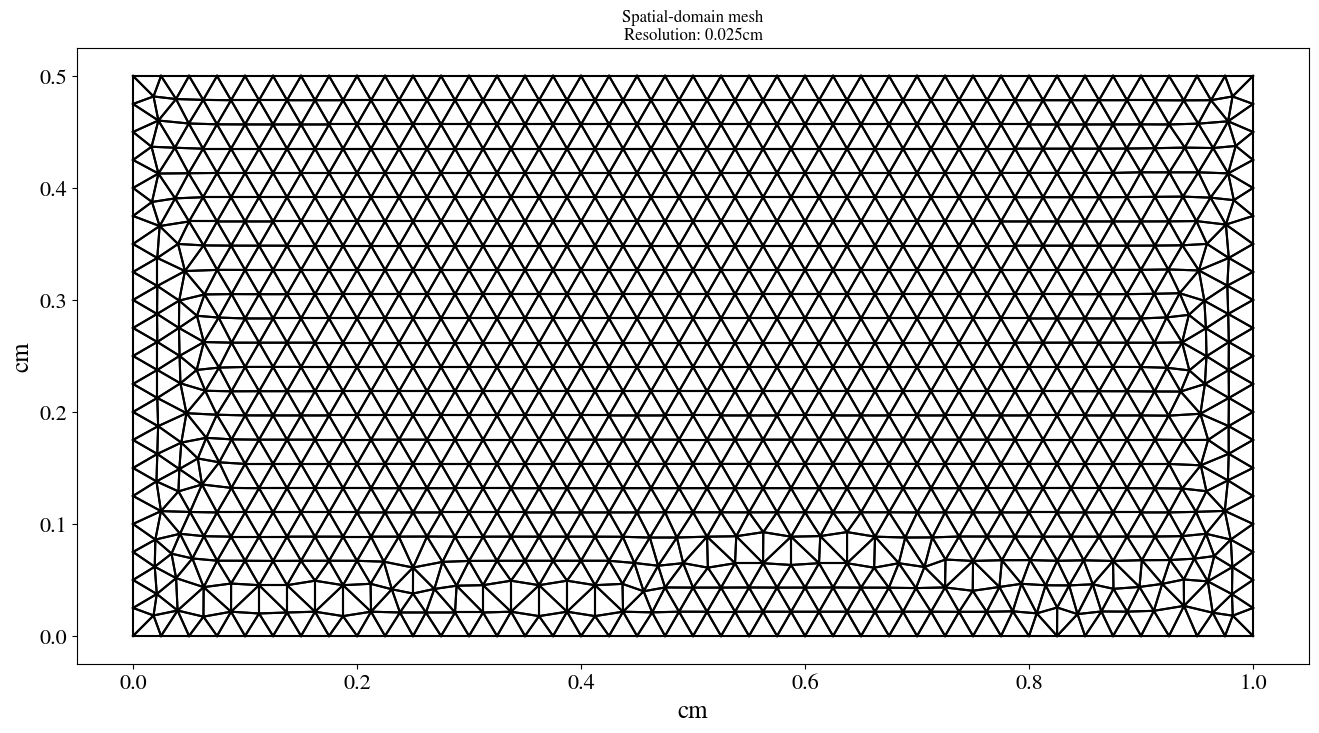

In [7]:
plotter.plot(model=cdr_model, plot_type='2D_mesh')

In [ ]:
models_list = ['ishigami']
kernel_types_list = ['sobolev']
model_params_dict = {'ishigami': {'g_ineq_c': 3, 'a': 7, 'b': 0.1},
                    'toy_1': {'g_ineq_c': 0},
                    'toy_2': {'g_ineq_c': 0},
                    'linearDecr_1': {'g_ineq_c': 3.75},
                    'linearDecr_2': {'g_ineq_c': 5.25},
                    'toy_model_vect' : {'meshInterval': 128, 'c_1': 1, 'c_2': 1, 'g_ineq_c': 0.0}}
x_domains_dict = {'ishigami': np.array([[-1.0, 1.0]]),
                'toy_1': np.array([[-5,5],[-5,5]]),
                'toy_2': np.array([[-5,5],[-5,5]]),
                'linearDecr_1': np.array([[0.25,0.75]]),
                'linearDecr_2': np.array([[0.25,0.75]]),
                'toy_model_vect': np.array([[-1,1]])}
u_domains_dict = {'ishigami': np.array([[-np.pi, np.pi], [-np.pi, np.pi]]),
                'toy_1': np.array([[-5,5],[-5,5]]),
                'toy_2': np.array([[-5,5],[-5,5]]),
                'linearDecr_1': np.array([[0,1],[0,1],[0,1]]),
                'linearDecr_2': np.array([[0,1],[0,1],[0,1]]),
                'toy_model_vect': np.array([[-1,1], [-1,1]])}
num_of_trials = 20
# num_of_trials = 5
n_list = [500]
# n_list = [50]
hsic_types_dict = {'unbiased': False, 'biased': False, 'R2': False, 'fellman': True}


In [ ]:
for n_list in N_list_list:
        file_name = get_kbsa_datafile_name(models_list=models_list, 
                                x_domains_dict=x_domains_dict, 
                                kernel_types_list=kernel_types_list, 
                                hsic_types_dict=hsic_types_dict, 
                                n_list=n_list, 
                                num_of_trials=num_of_trials,
                                model_params_dict=model_params_dict)

        data = run_kbsa(hsic_types_dict=hsic_types_dict,
                        kernel_types_list=kernel_types_list,
                        models_list=models_list,
                        model_params_dict=model_params_dict,
                        x_domains_dict=x_domains_dict,
                        sample_x_from_mesh=True,
                        u_domains_dict=u_domains_dict,
                        num_of_trials=num_of_trials,
                        n_list=n_list,
                        m_same_as_n=True,
                        save_data=True,
                        with_gpu=False,
                        save_directory='data/g_1/kbsa',
                        file_name=file_name,
                        verbose_inner=True,
                        verbose_outer=True,
                        verbose_inner_inner=True)